# The Sparks Foundation - GRIP - Data Science and Business Analytics(JUN'21)

# Task 1 : Prediction using Supervised ML

# Creator : Md. Hyder Siddiqui


### Dataset : student_scores.csv - 
https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

### Programming language : Python
                                      

### Problem Statement :
#### > Predict the percentage of an student based on the no. of study hours
#### > What will be predicted score if a student studies for 9.25 hrs/ day?

In [27]:
#Import required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Reading the CSV file:

data = pd.read_csv('student_scores.csv')
data.head(6) 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
data.describe() #Gives us all the neccesary statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
data.shape

(25, 2)

#### Visualizing the data

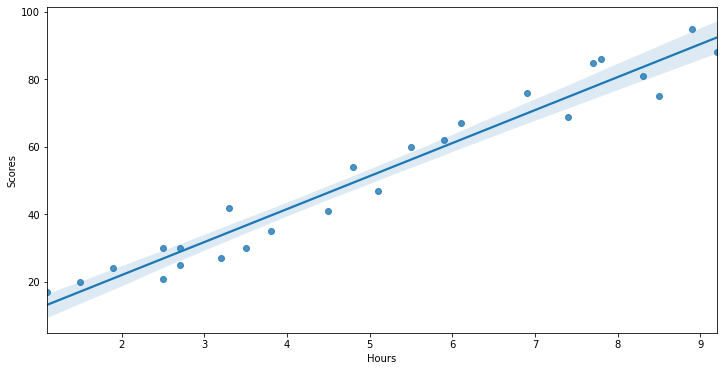

In [32]:
plt.figure(figsize=(12,6))
sns.regplot(x='Hours',y='Scores',data=data)

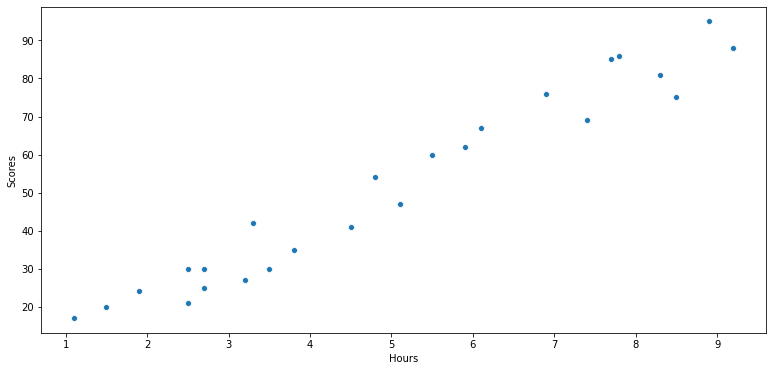

In [41]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Hours',y='Scores',data=data,palette='magma')

#### Distinguishing Feature and target

In [50]:
F = data[['Hours']] #This will be our feature
t = data['Scores'] #This will be our Target

#### Seperating validation Data (Train-test split)

In [51]:
from sklearn.model_selection import train_test_split
F_train, F_test, t_train, t_test = train_test_split(F, t, test_size=0.4, random_state=0) 

#### Training the ML Algorithm (Model Building)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(F_train,t_train) #Training the model

LinearRegression()

In [56]:
pred_t = regressor.predict(F_test) #Making Prediction
pd.DataFrame({'Actual':t_test,'Predicted':pred_t}) 

,Actual,Predicted
5,20,15.947762
2,27,32.773947
19,69,74.344523
16,30,25.845518
11,62,59.497889
22,35,38.712601
17,24,19.906864
24,86,78.303625
23,76,69.395645
14,17,11.988659


#### Visualize the Predicitons

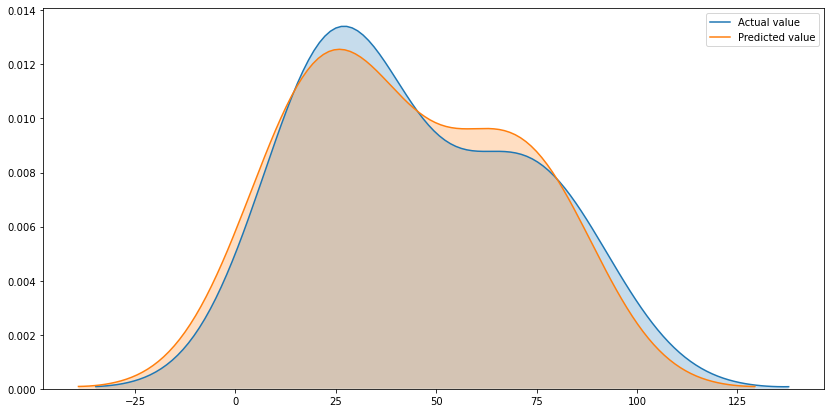

In [62]:
plt.figure(figsize=(14,7))
sns.kdeplot(t_test,label='Actual value',shade=True)
sns.kdeplot(pred_t,label='Predicted value',shade=True)

In [64]:
#Check the Accuracy of the Model
print('Train Accuracy:',regressor.score(F_train,t_train),'\nTest Acuracy:',regressor.score(F_test,t_test))

Train Accuracy: 0.9440108159733135 
Test Acuracy: 0.956640847232559


In [74]:
#Score of a student if he studies 9.25 hours
hours = [[9.25]]
cust_pred = regressor.predict(hours)
print('A Student who studies for',hours[0][0],'hours will score around',cust_pred[0])

A Student who studies for 9.25 hours will score around 92.65537184734602


#### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the "Explained Variance Score".

In [77]:
from sklearn import metrics  
print('Explained Variance Score:',metrics.explained_variance_score(t_test, pred_t))

Explained Variance Score: 0.9628335191378917


## Thank You !!